# Introduction:

In this project, data on insurance is analysed and model is built for predicting whether the claim by the Hospital to the Insurance company is Fraudulent or Genuine

# Objective:

To predict whether the claim by the Hospital to the Insurance company is Fraudulent or Genuine

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import dataset

In [2]:
#from google.colab import files
#upload=files.upload()

In [3]:
insu_data_original=pd.read_csv('Insurance Dataset.csv')

# Exploratory Data Analysis

In [4]:
insu_data_original.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [5]:
insu_data_original.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [6]:
insu_data=insu_data_original.copy()

In [7]:
insu_data.rename(columns={'Hospital County':'hospital_county','Hospital Id':'hospital_id','Home or self care,':'home_self_care','Mortality risk':'mortality_risk','Emergency dept_yes/No':'emergency_dept_yes_no'},inplace=True)

In [8]:
insu_data.columns

Index(['Area_Service', 'hospital_county', 'hospital_id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'home_self_care', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'mortality_risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'emergency_dept_yes_no',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [9]:
type(insu_data)

pandas.core.frame.DataFrame

In [10]:
insu_data.head()

,Area_Service,hospital_county,hospital_id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,home_self_care,...,mortality_risk,Surg_Description,Weight_baby,Abortion,emergency_dept_yes_no,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [11]:
insu_data.columns

Index(['Area_Service', 'hospital_county', 'hospital_id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'home_self_care', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'mortality_risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'emergency_dept_yes_no',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [12]:
insu_data.shape

(1048575, 24)

In [13]:
insu_data.describe()

,hospital_id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,mortality_risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.046119e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048533e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.529400e+02,1.987936e+02,9.723249e+01,2.051806e+00,1.748955e+00,2.935512e+02,2.708697e+04,1.046399e+04,4.565822e-01,7.499769e-01,1.935755e+00
std,6.711577e+02,1.652839e+02,8.732697e+01,9.145785e-01,9.864236e-01,9.494631e+02,5.487428e+04,2.230366e+04,8.029246e-01,4.330263e-01,7.717916e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.130000e+02,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.402500e+03,3.234570e+03,3.135802e-01,0.000000e+00,1.000000e+00
50%,6.300000e+02,1.590000e+02,9.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.458988e+04,5.928480e+03,4.091384e-01,1.000000e+00,2.000000e+00
75%,9.770000e+02,2.180000e+02,1.740000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.914547e+04,1.134317e+04,5.192548e-01,1.000000e+00,3.000000e+00
max,9.250000e+03,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


In [14]:
insu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   hospital_county                        1046119 non-null  object 
 2   hospital_id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   home_self_care                         1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [15]:
insu_data_columns=['Area_Service', 'hospital_county', 'hospital_id', 'Age', 'Gender','Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type','home_self_care', 'ccs_diagnosis_code', 'ccs_procedure_code','apr_drg_description', 'Code_illness', 'mortality_risk','Surg_Description', 'Weight_baby', 'Abortion', 'emergency_dept_yes_no','Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges','Result', 'Payment_Typology']
insu_data_columns

['Area_Service',
 'hospital_county',
 'hospital_id',
 'Age',
 'Gender',
 'Cultural_group',
 'ethnicity',
 'Days_spend_hsptl',
 'Admission_type',
 'home_self_care',
 'ccs_diagnosis_code',
 'ccs_procedure_code',
 'apr_drg_description',
 'Code_illness',
 'mortality_risk',
 'Surg_Description',
 'Weight_baby',
 'Abortion',
 'emergency_dept_yes_no',
 'Tot_charg',
 'Tot_cost',
 'ratio_of_total_costs_to_total_charges',
 'Result',
 'Payment_Typology']

In [16]:
for i in insu_data_columns:
   print(len(insu_data[i].unique()))

8
52
144
5
3
4
3
120
6
19
262
230
316
5
5
3
70
2
2
869659
766537
987065
2
5


In [17]:
insu_data.isnull().sum()

Area_Service                             2456
hospital_county                          2456
hospital_id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
home_self_care                              0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
mortality_risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
emergency_dept_yes_no                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [18]:
insu_data.isnull().mean()

Area_Service                             0.002342
hospital_county                          0.002342
hospital_id                              0.002342
Age                                      0.000000
Gender                                   0.000000
Cultural_group                           0.000000
ethnicity                                0.000000
Days_spend_hsptl                         0.000000
Admission_type                           0.000000
home_self_care                           0.000000
ccs_diagnosis_code                       0.000000
ccs_procedure_code                       0.000000
apr_drg_description                      0.000000
Code_illness                             0.000000
mortality_risk                           0.000040
Surg_Description                         0.000000
Weight_baby                              0.000000
Abortion                                 0.000000
emergency_dept_yes_no                    0.000000
Tot_charg                                0.000000


#### Here we have percentage of null values as area of service=0.23, hospital_county=0.23, hospital_id=0.23, mortality_risk=0.04. So replacing these NA values with central tendencies.

In [19]:
#filling missing values with Mode 
insu_data['Area_Service'] = insu_data['Area_Service'].fillna(insu_data['Area_Service'].mode()[0])
insu_data['hospital_county'] = insu_data['hospital_county'].fillna(insu_data['hospital_county'].mode()[0])
#filling Hospital Id missing values with Median 
insu_data['hospital_id'] = insu_data['hospital_id'].fillna(insu_data['hospital_id'].median())
insu_data["mortality_risk"].fillna(0,inplace=True)

In [20]:
insu_data.isna().sum()

Area_Service                             0
hospital_county                          0
hospital_id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
home_self_care                           0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
mortality_risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
emergency_dept_yes_no                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [21]:
insu_data.head()

,Area_Service,hospital_county,hospital_id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,home_self_care,...,mortality_risk,Surg_Description,Weight_baby,Abortion,emergency_dept_yes_no,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


#### Now Check for Duplicates if any and delete them

In [22]:
insu_data.duplicated(keep='first').sum()

4814

In [24]:
insu_data.drop_duplicates(keep='first',inplace=True)
insu_data.duplicated(keep='first').sum()

0

#### Let us check count plots for categorical to find which category is having more frequent values

In [25]:
insu_data['Area_Service'].value_counts()

Hudson Valley      262535
Western NY         179371
Central NY         170225
Capital/Adirond    170076
Finger Lakes       155507
New York City       74309
Southern Tier       31738
Name: Area_Service, dtype: int64

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Area_Service', ylabel='count'>

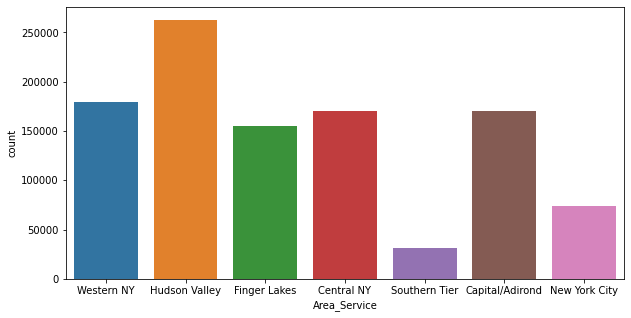

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(insu_data['Area_Service'])

In [27]:
len(insu_data['hospital_county'].unique())

51

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

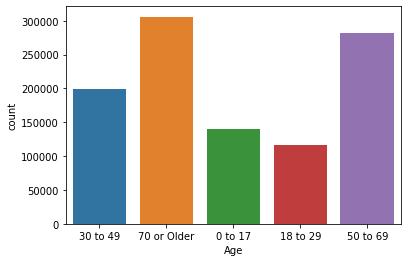

In [28]:
len(insu_data['Age'].unique())
insu_data['Age'].value_counts()
sns.countplot(insu_data['Age'])

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

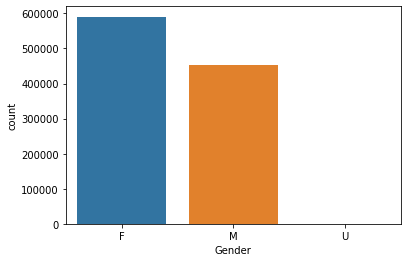

In [29]:
len(insu_data['Gender'].unique())
insu_data['Gender'].value_counts()
sns.countplot(insu_data['Gender'])

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cultural_group', ylabel='count'>

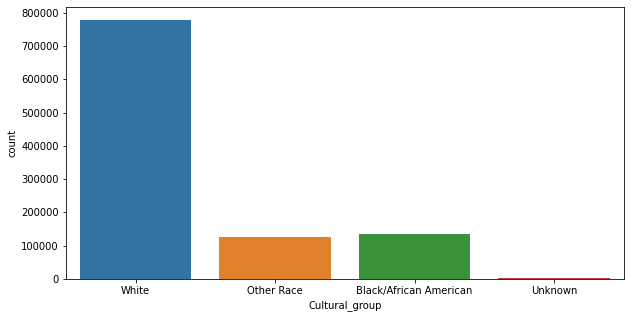

In [30]:
plt.figure(figsize=(10,5))
len(insu_data['Cultural_group'].unique())
insu_data['Cultural_group'].value_counts()
sns.countplot(insu_data['Cultural_group'])

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ethnicity', ylabel='count'>

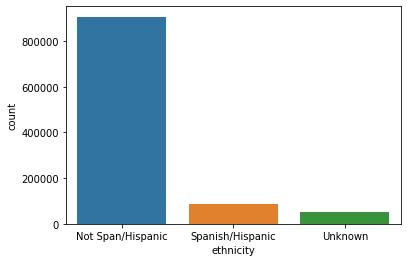

In [31]:
len(insu_data['ethnicity'].unique())
insu_data['ethnicity'].value_counts()
sns.countplot(insu_data['ethnicity'])

In [32]:
len(insu_data['Days_spend_hsptl'].unique())

120

In [33]:
insu_data['Days_spend_hsptl'].unique()

array(['4', '3', '1', '2', '5', '6', '14', '12', '9', '8', '10', '7',
       '22', '11', '16', '15', '25', '13', '17', '28', '18', '19', '23',
       '38', '20', '24', '26', '21', '27', '30', '29', '39', '87', '35',
       '37', '32', '55', '56', '49', '110', '69', '75', '42', '51', '47',
       '45', '46', '40', '34', '79', '43', '120 +', '65', '41', '31',
       '50', '59', '44', '36', '70', '115', '58', '94', '33', '68', '67',
       '54', '80', '85', '95', '78', '91', '88', '48', '52', '63', '57',
       '74', '64', '53', '62', '97', '72', '118', '81', '90', '86', '106',
       '112', '105', '114', '66', '89', '83', '84', '82', '93', '116',
       '71', '60', '73', '61', '92', '76', '96', '77', '104', '100',
       '103', '102', '117', '108', '99', '107', '98', '101', '119', '111',
       '109', '113'], dtype=object)

#### Here Days_spend_hsptl is numerical but it is showing as object, So convert it to int and replacing '120+' with numeric value

In [34]:
insu_data['Days_spend_hsptl'].value_counts()

2      233074
3      189837
1      155408
4      113673
5       73643
        ...  
108        20
116        20
110        19
101        15
113         7
Name: Days_spend_hsptl, Length: 120, dtype: int64

In [35]:
insu_data['Days_spend_hsptl'].replace(to_replace='120 +',value='121',inplace=True)

In [37]:
insu_data['Days_spend_hsptl']=insu_data['Days_spend_hsptl'].astype('int64')

In [38]:
insu_data['Days_spend_hsptl'].unique()

array([  4,   3,   1,   2,   5,   6,  14,  12,   9,   8,  10,   7,  22,
        11,  16,  15,  25,  13,  17,  28,  18,  19,  23,  38,  20,  24,
        26,  21,  27,  30,  29,  39,  87,  35,  37,  32,  55,  56,  49,
       110,  69,  75,  42,  51,  47,  45,  46,  40,  34,  79,  43, 121,
        65,  41,  31,  50,  59,  44,  36,  70, 115,  58,  94,  33,  68,
        67,  54,  80,  85,  95,  78,  91,  88,  48,  52,  63,  57,  74,
        64,  53,  62,  97,  72, 118,  81,  90,  86, 106, 112, 105, 114,
        66,  89,  83,  84,  82,  93, 116,  71,  60,  73,  61,  92,  76,
        96,  77, 104, 100, 103, 102, 117, 108,  99, 107,  98, 101, 119,
       111, 109, 113], dtype=int64)

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Admission_type', ylabel='count'>

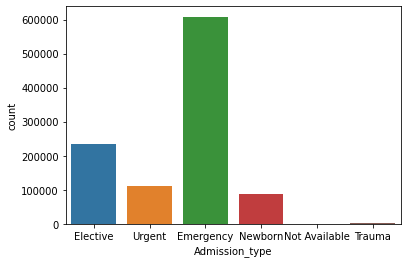

In [39]:
len(insu_data['Admission_type'].unique())
insu_data['Admission_type'].value_counts()
sns.countplot(insu_data['Admission_type'])

In [40]:
len(insu_data['home_self_care'].unique())

19

In [41]:
len(insu_data['ccs_procedure_code'].unique())

230

In [42]:
len(insu_data['apr_drg_description'].unique())

316

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Code_illness', ylabel='count'>

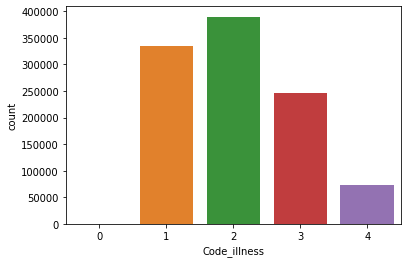

In [43]:
len(insu_data['Code_illness'].unique())
insu_data['Code_illness'].value_counts()
sns.countplot(insu_data['Code_illness'])

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mortality_risk', ylabel='count'>

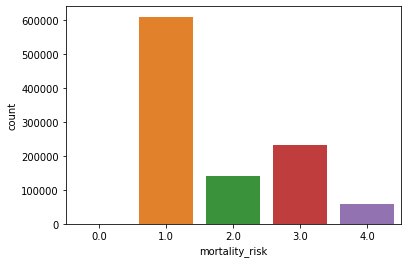

In [44]:
len(insu_data['mortality_risk'].unique())
insu_data['mortality_risk'].value_counts()
sns.countplot(insu_data['mortality_risk'])

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Surg_Description', ylabel='count'>

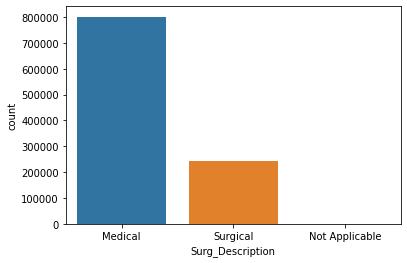

In [45]:
len(insu_data['Surg_Description'].unique())
insu_data['Surg_Description'].value_counts()
sns.countplot(insu_data['Surg_Description'])

In [46]:
len(insu_data['ccs_diagnosis_code'].unique())

262

In [47]:
len(insu_data['Weight_baby'].unique())

70

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Abortion', ylabel='count'>

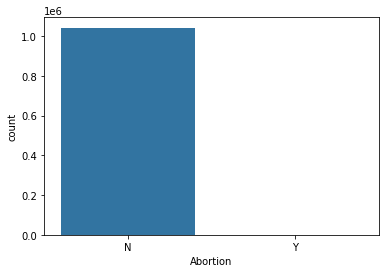

In [48]:
len(insu_data['Abortion'].unique())
insu_data['Abortion'].value_counts()
sns.countplot(insu_data['Abortion'])

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='emergency_dept_yes_no', ylabel='count'>

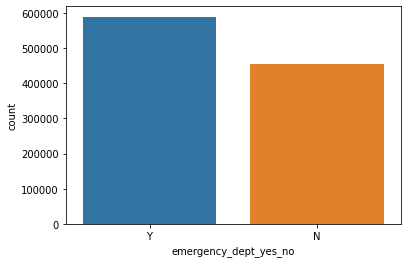

In [49]:
len(insu_data['emergency_dept_yes_no'].unique())
insu_data['emergency_dept_yes_no'].value_counts()
sns.countplot(insu_data['emergency_dept_yes_no'])

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Result', ylabel='count'>

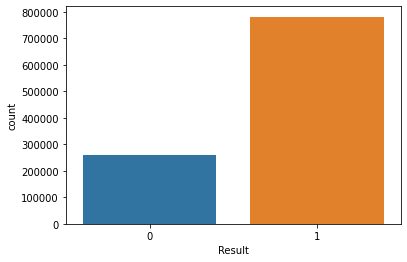

In [50]:
len(insu_data['Result'].unique())
insu_data['Result'].value_counts()
sns.countplot(insu_data['Result'])

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Payment_Typology', ylabel='count'>

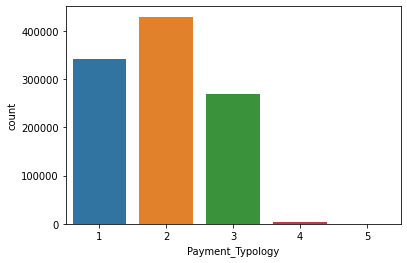

In [51]:
len(insu_data['Payment_Typology'].unique())
insu_data['Payment_Typology'].value_counts()
sns.countplot(insu_data['Payment_Typology'])

### Let us check for outliers

<AxesSubplot:>

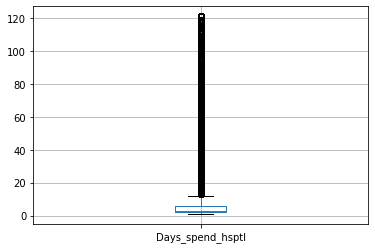

In [52]:
insu_data.boxplot('Days_spend_hsptl')

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days_spend_hsptl', ylabel='Density'>

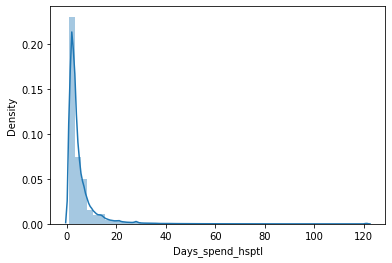

In [53]:
sns.distplot(insu_data['Days_spend_hsptl'])

<AxesSubplot:>

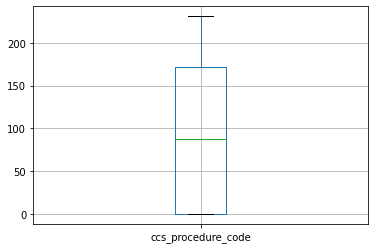

In [54]:
insu_data.boxplot(column='ccs_procedure_code')

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ccs_procedure_code', ylabel='Density'>

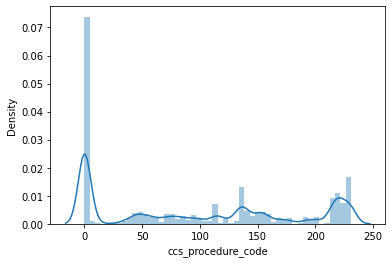

In [55]:
sns.distplot(insu_data.ccs_procedure_code)

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ccs_diagnosis_code', ylabel='Density'>

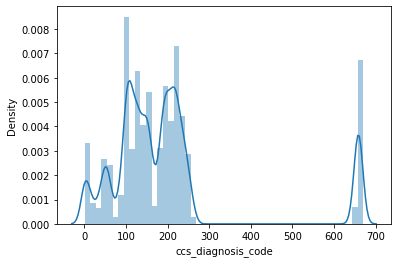

In [56]:
sns.distplot(insu_data.ccs_diagnosis_code)

<AxesSubplot:>

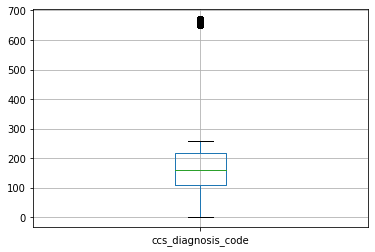

In [57]:
insu_data.boxplot(column='ccs_diagnosis_code')

<AxesSubplot:>

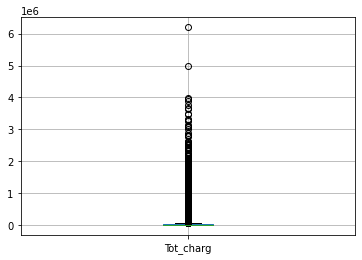

In [58]:
insu_data.boxplot(column='Tot_charg')

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tot_charg', ylabel='Density'>

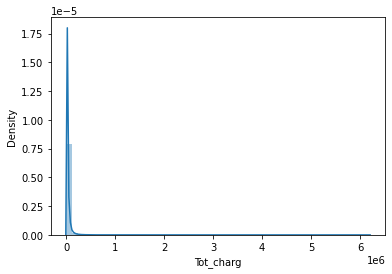

In [59]:
sns.distplot(insu_data.Tot_charg)

<AxesSubplot:>

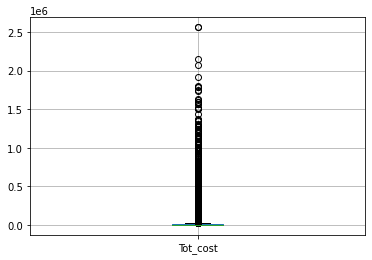

In [60]:
insu_data.boxplot(column='Tot_cost')

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tot_cost', ylabel='Density'>

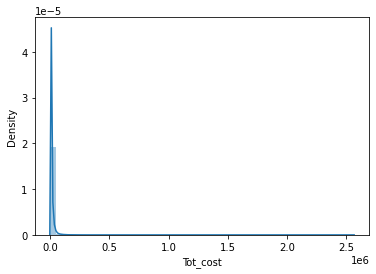

In [61]:
sns.distplot(insu_data.Tot_cost)

<AxesSubplot:>

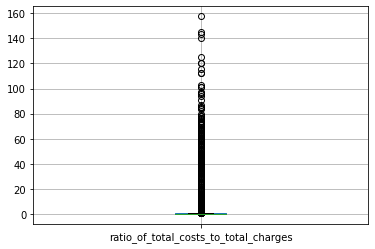

In [62]:
insu_data.boxplot(column='ratio_of_total_costs_to_total_charges')

C:\Users\HP\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratio_of_total_costs_to_total_charges', ylabel='Density'>

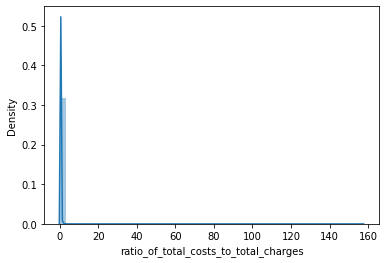

In [63]:
sns.distplot(insu_data.ratio_of_total_costs_to_total_charges)

In [64]:
insu_data.skew()

hospital_id                               6.557838
Days_spend_hsptl                          6.565761
ccs_diagnosis_code                        1.946566
ccs_procedure_code                        0.221264
Code_illness                              0.443766
mortality_risk                            0.867942
Weight_baby                               3.110764
Tot_charg                                18.074458
Tot_cost                                 27.554971
ratio_of_total_costs_to_total_charges    95.725052
Result                                   -1.150973
Payment_Typology                          0.154035
dtype: float64

# Feature Engineering

### Converting Categorical Features to Numerical

In [65]:
string_columns=['Area_Service','hospital_county','Age','Gender','Cultural_group','ethnicity','Admission_type','home_self_care','apr_drg_description','Surg_Description','Abortion','emergency_dept_yes_no']

In [66]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

for i in string_columns:
    insu_data[i]=label_encoder.fit_transform(insu_data[i])

In [67]:
insu_data.head()

,Area_Service,hospital_county,hospital_id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,home_self_care,...,mortality_risk,Surg_Description,Weight_baby,Abortion,emergency_dept_yes_no,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,6,1,37.0,2,0,3,0,4,0,7,...,1.0,0,0,0,1,5511.95,5582.49,1.012798,1,1
1,6,1,37.0,4,0,3,0,4,5,17,...,2.0,0,0,0,1,4783.20,5162.82,1.079365,1,1
2,6,1,37.0,2,0,3,0,3,5,7,...,1.0,0,0,0,1,3829.15,4056.52,1.059379,1,1
3,6,1,37.0,0,0,3,0,1,5,7,...,1.0,0,0,0,1,1108.20,1644.75,1.484167,0,1
4,6,1,37.0,4,0,3,0,3,0,7,...,3.0,0,0,0,1,3418.18,3370.87,0.986161,1,1


#### From EDA we observed that Abortion feature is creating biasness since there is only one category so deleting that feature. 

#### From all the Analysis and observations hospital_id,hospital_county,Weight_baby,apr_drg_description, ratio_of_total_costs_to_total_charges are some of the features we observe which are not impacting much, so dropping these features as well.

In [68]:
insu_data.drop(columns=['Abortion'],inplace=True)

In [69]:
#Dropping hospital_id,hospital_county,baby_weight,app_drug_description,ratio_of_total_charges as they does not have much impact on Target
insu_data = insu_data.drop(['hospital_county', 'hospital_id','Weight_baby','apr_drg_description','ratio_of_total_costs_to_total_charges'],inplace=False,axis=1)
insu_data.head()

,Area_Service,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,home_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,mortality_risk,Surg_Description,emergency_dept_yes_no,Tot_charg,Tot_cost,Result,Payment_Typology
0,6,2,0,3,0,4,0,7,122,0,1,1.0,0,1,5511.95,5582.49,1,1
1,6,4,0,3,0,4,5,17,197,0,3,2.0,0,1,4783.20,5162.82,1,1
2,6,2,0,3,0,3,5,7,122,0,1,1.0,0,1,3829.15,4056.52,1,1
3,6,0,0,3,0,1,5,7,122,0,1,1.0,0,1,1108.20,1644.75,0,1
4,6,4,0,3,0,3,0,7,122,0,2,3.0,0,1,3418.18,3370.87,1,1


In [70]:
insu_data.shape

(1043761, 18)

### Check for Correlation between Features

In [71]:
insu_data.corr()

,Area_Service,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,home_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,mortality_risk,Surg_Description,emergency_dept_yes_no,Tot_charg,Tot_cost,Result,Payment_Typology
Area_Service,1.000000,-0.006834,-0.003880,-0.121926,-0.082119,0.013977,-0.077236,0.023732,0.002708,0.007466,0.003950,-0.001813,0.000047,0.040467,0.015498,0.021334,0.000004,0.057755
Age,-0.006834,1.000000,0.010913,0.186841,-0.102025,0.092051,-0.109406,0.303176,-0.222645,-0.119825,0.413808,0.498642,0.090991,0.342108,0.100003,0.084976,0.002090,0.251672
Gender,-0.003880,0.010913,1.000000,0.000523,-0.002654,0.045817,0.007039,-0.021103,0.063164,-0.019835,0.067311,0.067529,-0.037497,0.077109,0.046418,0.030912,0.000038,-0.006977
Cultural_group,-0.121926,0.186841,0.000523,1.000000,-0.112354,-0.035564,0.021739,0.062032,-0.063450,-0.051070,0.046961,0.086860,0.065257,-0.003646,-0.041336,-0.021789,-0.000312,-0.081502
ethnicity,-0.082119,-0.102025,-0.002654,-0.112354,1.000000,-0.013495,0.059717,-0.050596,0.037999,0.020444,-0.056374,-0.060166,-0.034455,-0.022735,-0.021150,-0.020200,0.001304,-0.049928
Days_spend_hsptl,0.013977,0.092051,0.045817,-0.035564,-0.013495,1.000000,0.015869,0.150028,0.131010,0.039043,0.324976,0.211258,0.023939,0.026098,0.666881,0.616245,-0.000646,0.057692
Admission_type,-0.077236,-0.109406,0.007039,0.021739,0.059717,0.015869,1.000000,-0.040373,0.012572,-0.002641,0.019036,0.013776,-0.163369,-0.076306,-0.031412,-0.022220,-0.001341,0.013384
home_self_care,0.023732,0.303176,-0.021103,0.062032,-0.050596,0.150028,-0.040373,1.000000,-0.069997,-0.000596,0.241798,0.243157,0.022927,0.141801,0.107476,0.096845,0.000551,0.127107
ccs_diagnosis_code,0.002708,-0.222645,0.063164,-0.063450,0.037999,0.131010,0.012572,-0.069997,1.000000,0.051225,-0.181650,-0.269088,-0.148558,-0.100481,-0.076226,-0.041853,0.000351,-0.074999
ccs_procedure_code,0.007466,-0.119825,-0.019835,-0.051070,0.020444,0.039043,-0.002641,-0.000596,0.051225,1.000000,0.013420,-0.035028,0.047623,-0.170238,0.025696,0.033946,-0.000420,-0.050862


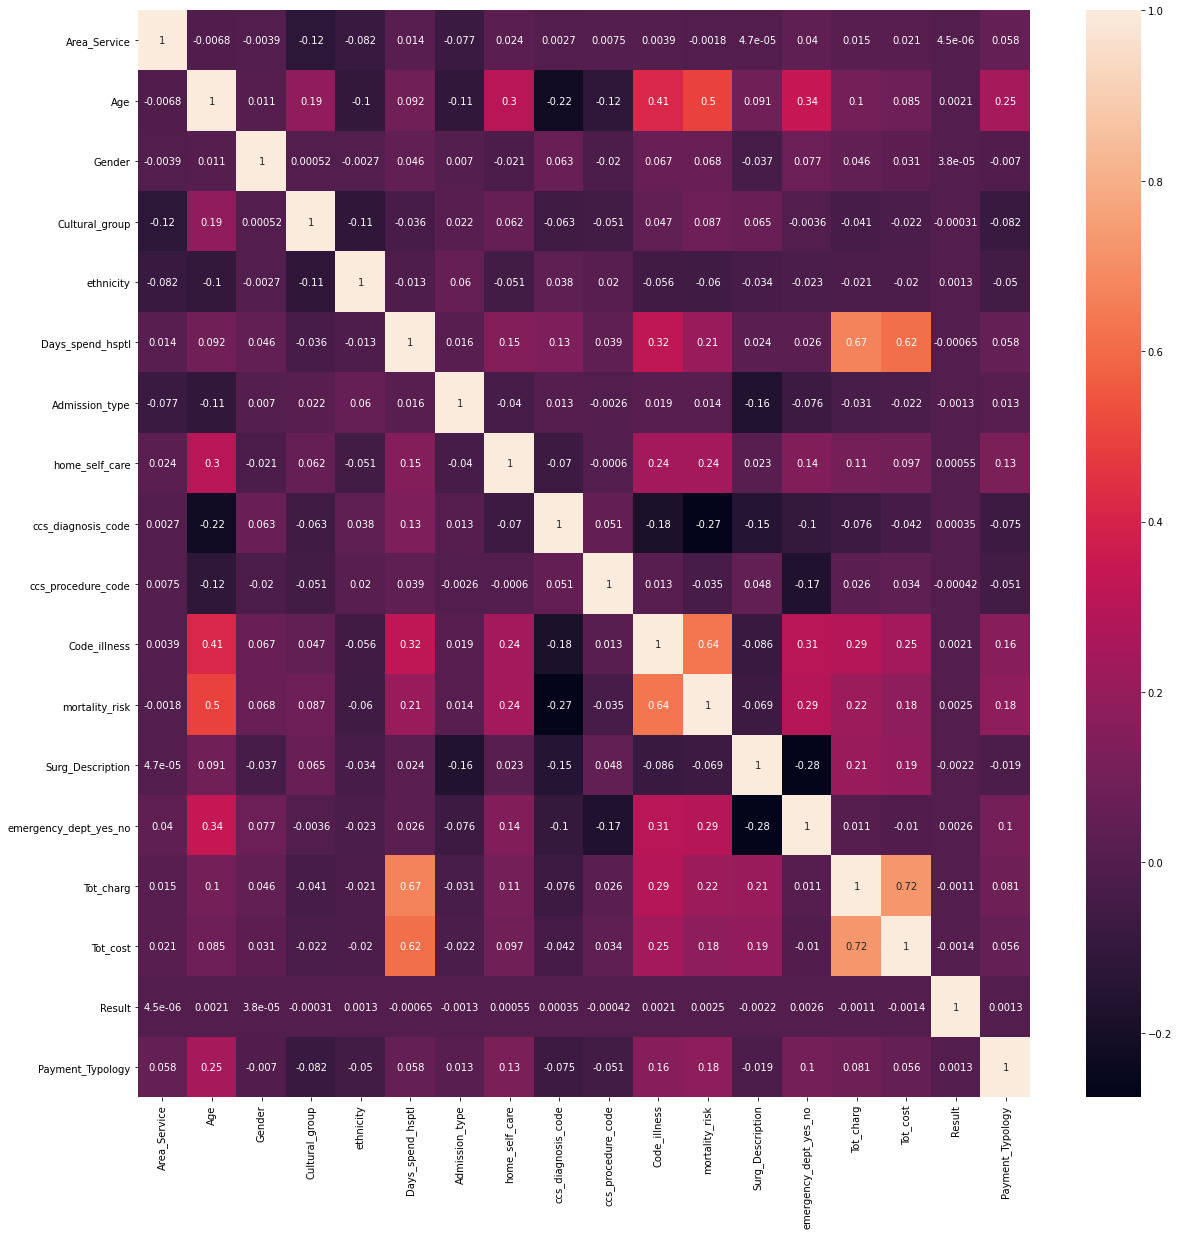

In [74]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = insu_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(insu_data[top_corr_features].corr(),annot=True)

### Dividing data in to Predictors and Target

In [75]:
X=insu_data.drop(columns=['Result'])
X.columns
X.head()

,Area_Service,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,home_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,mortality_risk,Surg_Description,emergency_dept_yes_no,Tot_charg,Tot_cost,Payment_Typology
0,6,2,0,3,0,4,0,7,122,0,1,1.0,0,1,5511.95,5582.49,1
1,6,4,0,3,0,4,5,17,197,0,3,2.0,0,1,4783.20,5162.82,1
2,6,2,0,3,0,3,5,7,122,0,1,1.0,0,1,3829.15,4056.52,1
3,6,0,0,3,0,1,5,7,122,0,1,1.0,0,1,1108.20,1644.75,1
4,6,4,0,3,0,3,0,7,122,0,2,3.0,0,1,3418.18,3370.87,1


In [76]:
Y=insu_data.Result
Y

0          1
1          1
2          1
3          0
4          1
          ..
1048570    1
1048571    1
1048572    0
1048573    1
1048574    1
Name: Result, Length: 1043761, dtype: int64

In [77]:
X.shape

(1043761, 17)

# Feature Selection

### Feature Importance using Extra Trees Classifier

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
feat_imp = ExtraTreesClassifier()
feat_imp.fit(X,Y)

ExtraTreesClassifier()

In [79]:
print(feat_imp.feature_importances_)

[0.0445344  0.02868458 0.01127429 0.01200927 0.00768513 0.10010891
 0.010111   0.04274225 0.12876936 0.07198609 0.02343382 0.01384685
 0.00200934 0.00323302 0.23562135 0.23506379 0.02888655]


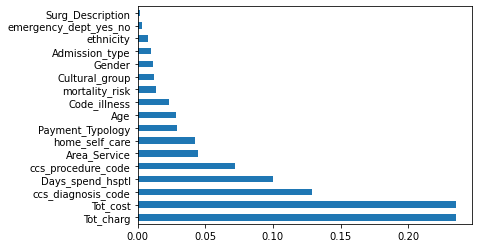

In [80]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feat_imp.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Check whether Data is Balanced or Imbalanced

In [82]:
Y.value_counts()

1    782188
0    261573
Name: Result, dtype: int64

#### From the data we came to know that data is containing 75% of Genuine data (1) and 25% of Fraudulent (0) data.

#### This imbalance may create biasness in the model towards Genuine data, So Over Sampling is done to balance the data.

### Random Over Sampling

In [83]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = os.fit_resample(X, Y)
X_over.shape,Y_over.shape

((1564376, 17), (1564376,))

In [84]:
from collections import Counter
print(Counter(Y))
print(Counter(Y_over))

Counter({1: 782188, 0: 261573})
Counter({1: 782188, 0: 782188})


# Model Building

### Splitting data in to partitions for Training and Testing.

#### 80% of data for Training the model and 20% of data or Testing the model.

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_over,Y_over,test_size=0.2)

In [114]:
x_test=x_test.reset_index(drop=True)

y_test=pd.DataFrame(y_test)
y_test=y_test.reset_index(drop=True)

### Model Building using Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=3)
rf.fit(x_train,y_train)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_rf=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf))
train_acc_rf=round(rf.score(x_train, y_train) * 100, 2)
test_acc_rf=round(accuracy_score(y_test,y_pred_rf)*100,2)
print('Train_Accuracy_score= {}'.format(train_acc_rf))
print("Test_Accuracy Score= {}".format(test_acc_rf))

print("Classification report: {}".format(classification_report(y_test,y_pred_rf)))

[[142444  13945]
 [ 16610 139877]]
Train_Accuracy_score= 99.46
Test_Accuracy Score= 90.23
Classification report:               precision    recall  f1-score   support

           0       0.90      0.91      0.90    156389
           1       0.91      0.89      0.90    156487

    accuracy                           0.90    312876
   macro avg       0.90      0.90      0.90    312876
weighted avg       0.90      0.90      0.90    312876



In [118]:
y_pred_rf=pd.DataFrame(y_pred_rf)
y_pred_rf.columns=['Predicted Values']

In [127]:
y_pred_rf.value_counts()

Predicted Values
0                   159054
1                   153822
dtype: int64

In [120]:
y_test=pd.DataFrame(y_test)
y_test.columns=['Actual Values']

In [128]:
y_test.value_counts()

Actual Values
1                156487
0                156389
dtype: int64

#### Comparision of Actual Values and Predicted Values

In [126]:
comparision=pd.concat([y_test,y_pred_rf],axis=1)
comparision.head(10)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,1,1
9,1,1


###  ROC Curve and Score

In [123]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

In [124]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred_rf)
print('AUC: %.3f' % auc)

AUC: 0.902


Text(0, 0.5, 'True Positive Rate')

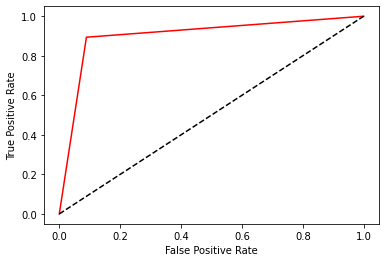

In [125]:
# Plotting of AUC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')